# Scenario 1

In [ ]:
#########One proportion z test

In [24]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [25]:
count = 28
nobs = 94
value = 0.16
stat, pval = proportions_ztest(count, nobs, value)
print(stat,pval)

2.9229268377264077 0.0034675798365736213


In [ ]:
#conclusion: p-value < 0.05 then we reject the null hypothesis and the hypothetical level of fraud is not equal to 16%

# Scenario 2

In [ ]:
##############Independent chi-square

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [27]:
df2 = pd.read_csv("C:/Users/User/Desktop/Intermediate_stat/antiseptics.csv")
df2.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)
df2

,Clinic,AS,Count
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38
5,2,B,112
6,2,C,14
7,2,D,69
8,3,A,84
9,3,B,298


In [28]:
df2_pivot = pd.pivot_table(df2,index='AS',columns='Clinic',values="Count")
df2_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [8]:
#assumption: we have more than 5 in each cell so the assumption is met for chi-square

In [29]:
#run the test
stats.chi2_contingency(df2_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

In [ ]:
#Interpretation: p-value > 0.05, it looks like there is not a significant relationship between antiseptics and clinics
#Conclusion: the usage of the four antiseptics is the same in the 3 clinics

# Scenario 3

In [10]:
#One-Way ANOVA

In [30]:
df3 = pd.read_csv("C:/Users/User/Desktop/Intermediate_stat/savings.csv")
df3.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


### Data Wrangling

In [31]:
df3_expanded=pd.melt(df3,var_name='Group', value_name='$')
df3_expanded

,Group,$
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18
...,...,...
227,Group D,12180.86
228,Group D,12972.11
229,Group D,12068.83
230,Group D,16064.42


In [33]:
df4_expanded = df3_expanded.replace(df3.columns, [0,1,2,3])
df4_expanded.head()

,Group,$
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


### Test Assumptions

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

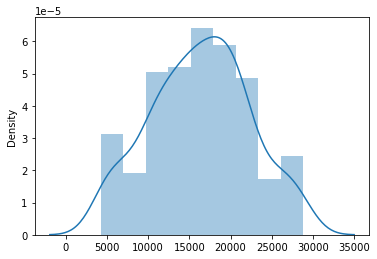

In [34]:
#normality
sns.distplot(df3.values[~np.isnan(df3.values)])

In [ ]:
#almost normal no need for transformation

In [35]:
#Homogeneity of Variance
scipy.stats.bartlett(df4_expanded['$'], df4_expanded['Group'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

In [ ]:
##p-value<0.05  unfortunately, wehave violated the assumption of homogeneity of variance.

In [ ]:
#sample size
#we have 232 entries per IV > 20 so this assumption is met

In [36]:
df3_expanded.dropna(inplace=True)

In [37]:
stats.f_oneway(df3_expanded['$'][df3_expanded['Group']=='Group A'],
                    df3_expanded['$'][df3_expanded['Group']=='Group B'],
                    df3_expanded['$'][df3_expanded['Group']=='Group C'],
              df3_expanded['$'][df3_expanded['Group']=='Group D'])

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

In [ ]:
##p-value<0.05 there is a significant difference in price somewhere between the four levels of the independent variable

In [40]:
postHoc = MultiComparison(df3_expanded['$'], df3_expanded['Group'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
Group A Group B  -4835.5416 0.001  -6431.1721   -3239.911   True
Group A Group C -14174.3925 0.001 -15708.4436 -12640.3414   True
Group A Group D  -8384.0728 0.001  -9898.9154  -6869.2303   True
Group B Group C  -9338.8509 0.001 -10906.4072  -7771.2947   True
Group B Group D  -3548.5313 0.001  -5097.2946   -1999.768   True
Group C Group D   5790.3197 0.001   4305.0777   7275.5616   True
----------------------------------------------------------------


In [ ]:
#the pairwise comparison between all groups are significant
#conclusion: the four demographics groups make different savings

# Scenario 4

In [ ]:
#Two proportion z test

In [18]:
stat, pval = proportions_ztest([374, 171], [503, 245])
print(stat,pval)

1.3156546893290748 0.18828996870412507


In [ ]:
##p-value>0.05 which means that the sample gives evidence there is not a significant difference in the proportions of favorable in either with or
#without age children